#### Loading the File

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

file_path = "/content/drive/MyDrive/EDA_UScitizens/adult_eda.csv"
data = pd.read_csv(file_path)
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


#### Handling Missing Values

In [ ]:
data.info()

In [4]:
data.isnull().sum()

,0
age,0
workclass,0
fnlwgt,0
education,0
education-num,0
marital-status,0
occupation,0
relationship,0
race,0
sex,0


In [2]:
data = data.dropna()

In [3]:
data.isnull().sum()
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'salary'],
      dtype='object')

### Training the Data

#### Encoding Categorical values

In [5]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
categories =['workclass', 'education', 'marital-status', 'occupation',
             'relationship', 'race', 'sex', 'native-country', 'salary' ]

label_encoder = {}

for category in categories:
  le = LabelEncoder()
  data[category] = le.fit_transform(data[category])
  label_encoder[category] = le

print("\nEncoded Data (First 5 rows):")
print(data.head())





Encoded Data (First 5 rows):
   age  workclass  fnlwgt  education  education-num  marital-status  \
0   39          7   77516          9           13.0               4   
1   50          6   83311          9           13.0               2   
2   38          4  215646         11            9.0               0   
3   53          4  234721          1            7.0               2   
4   28          4  338409          9           13.0               2   

   occupation  relationship  race  sex  capital-gain  capital-loss  \
0           1             1     4    1          2174             0   
1           4             0     4    1             0             0   
2           6             1     4    1             0             0   
3           6             0     2    1             0             0   
4          10             4     2    0             0             0   

   hours-per-week  native-country  salary  
0              40              39       0  
1              13              39 

#### Numerical Scaling

In [6]:
numerical_values = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

scaler = StandardScaler()
data[numerical_values] = scaler.fit_transform(data[numerical_values])

print("\nScaled Data (First 5 rows):")
print(data[numerical_values].head())



Scaled Data (First 5 rows):
        age    fnlwgt  education-num  capital-gain  capital-loss  \
0 -0.163959 -1.056651       1.058809      0.114107     -0.226483   
1  0.687010 -1.001852       1.058809     -0.156653     -0.226483   
2 -0.241320  0.249526      -0.449864     -0.156653     -0.226483   
3  0.919093  0.429902      -1.204201     -0.156653     -0.226483   
4 -1.014928  1.410390       1.058809     -0.156653     -0.226483   

   hours-per-week  
0       -0.148193  
1       -2.429880  
2       -0.148193  
3       -0.148193  
4       -0.148193  


#### Spliting the dataset

In [7]:
X = data.drop('salary', axis=1)
y = data['salary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

sm = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = sm.fit_resample(X_train, y_train)

print("Before resampling:")
print(pd.Series(y_train).value_counts())

print("\nAfter resampling:")
print(pd.Series(y_train_resampled).value_counts())

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


Before resampling:
salary
0    15415
1     6031
Name: count, dtype: int64

After resampling:
salary
0    15415
1    15415
Name: count, dtype: int64


### MODEL Selection

In [12]:
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import VotingClassifier



In [13]:
# Initialize the results dictionary
results = {}

# Train and evaluate the Voting Classifier
print("\nTraining Voting Classifier...")
ensemble_models = [
    ('Logistic Regression', LogisticRegression(max_iter=200, random_state=42)),
    ('Random Forest', RandomForestClassifier(random_state=42)),
    ('Gradient Boosting', GradientBoostingClassifier(random_state=42)),
    ('Neural Network', MLPClassifier(max_iter=500, random_state=42)),  # Neural Network
    ('Decision Tree', DecisionTreeClassifier(random_state=42))          # Decision Tree
]

voting_clf = VotingClassifier(estimators=ensemble_models, voting='soft')
voting_clf.fit(X_train_resampled, y_train_resampled)

y_pred_voting = voting_clf.predict(X_test)
y_proba_voting = voting_clf.predict_proba(X_test)[:, 1]

accuracy = accuracy_score(y_test, y_pred_voting)
precision = classification_report(y_test, y_pred_voting, output_dict=True)["weighted avg"]["precision"]
recall = classification_report(y_test, y_pred_voting, output_dict=True)["weighted avg"]["recall"]
f1 = classification_report(y_test, y_pred_voting, output_dict=True)["weighted avg"]["f1-score"]
roc_auc = roc_auc_score(y_test, y_proba_voting)

results['Voting Classifier'] = {
    "Accuracy": accuracy,
    "Precision": precision,
    "Recall": recall,
    "F1-Score": f1,
    "ROC-AUC": roc_auc,
}


results_df = pd.DataFrame(results).T
print("\nModel Performance Metrics (Voting Classifier Only):")
print(results_df)



Training Voting Classifier...

Model Performance Metrics (Voting Classifier Only):
                   Accuracy  Precision   Recall  F1-Score   ROC-AUC
Voting Classifier   0.80567   0.816699  0.80567  0.809532  0.883481


### Confusion Matrix & Feauture Importance

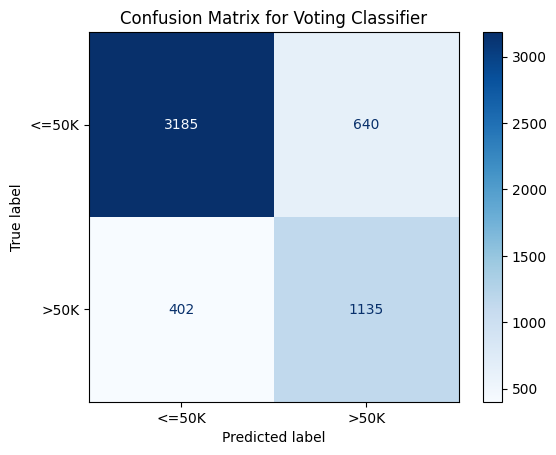

In [15]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


# Confusion matrix for Voting Classifier
cm = confusion_matrix(y_test, y_pred_voting)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['<=50K', '>50K'])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for Voting Classifier")
plt.show()


The model Logistic Regression does not support feature importance analysis.


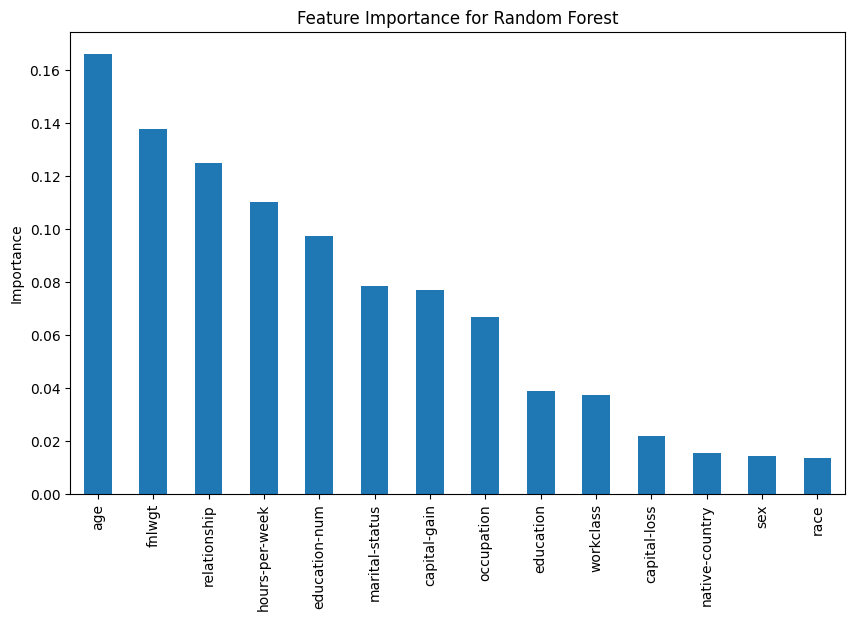

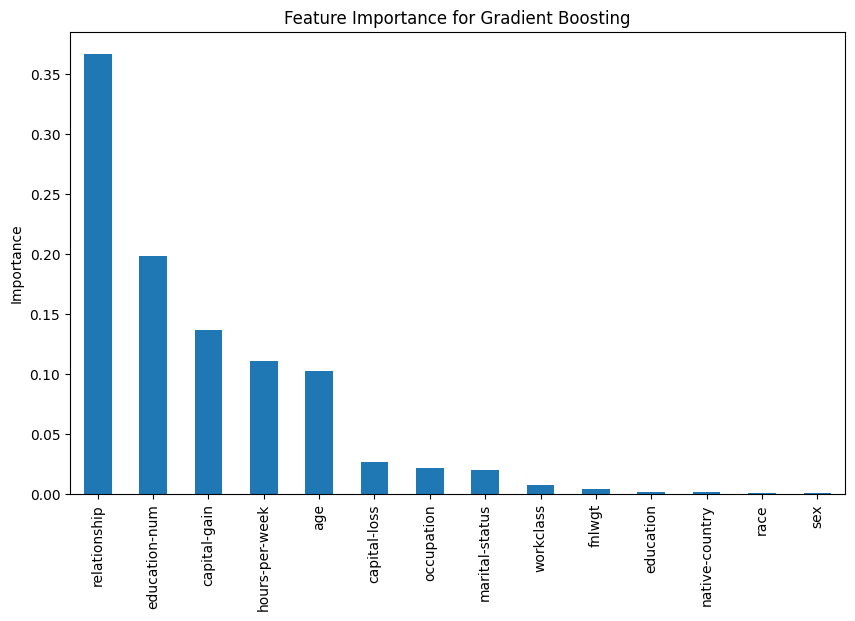

The model Neural Network does not support feature importance analysis.


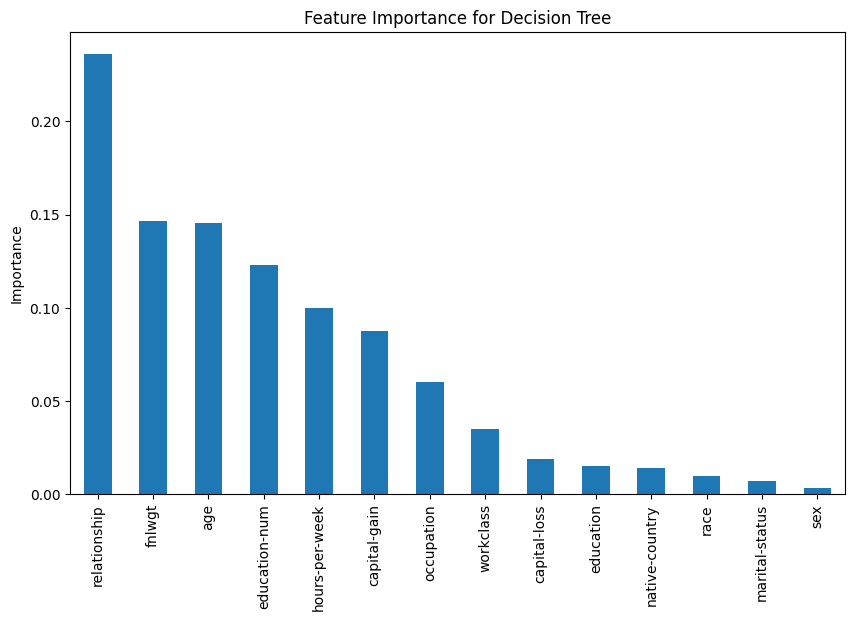

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Extract feature importance from individual models in the Voting Classifier
for name, model in voting_clf.named_estimators_.items():
    if hasattr(model, "feature_importances_"):
        # Get feature importances
        feature_importances = pd.Series(model.feature_importances_, index=X_train.columns)
        feature_importances = feature_importances.sort_values(ascending=False)

        # Plot feature importances
        plt.figure(figsize=(10, 6))
        feature_importances.plot(kind="bar")
        plt.title(f"Feature Importance for {name}")
        plt.ylabel("Importance")
        plt.show()
    else:
        print(f"The model {name} does not support feature importance analysis.")
